might not be useful:

['id', 'funder','installer','subvillage', 'scheme_management', 'scheme_name', 'recorded_by', 'wpt_name']

might be useful but need fillna: 

['public_meeting', 'permit']

nominal features: 

['date_recorded', 'basin', 'region', 'region_code', 'district_code', 'lga', 'ward', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']

ordinal features: []

continuous features: 

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year'] 

target: 

['status_group']





In [ ]:
# Do not modify this
%autosave 60 
import gdown
import pandas as pd

# Download the training data from drive
trainURL = "https://drive.google.com/uc?id=11WSDMvwLB5jn3Bjw5KT4LkaIdvtQCl38"
gdown.download(trainURL, "train.csv", quiet=True)

# Read in the training data to a pandas dataframe called train
train = pd.read_csv("train.csv")
display(train.shape)
train.head()

Autosaving every 60 seconds


(47520, 40)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,1,500.0,2/22/2011,Government Of Tanzania,1802,DWE,34.910035,-9.203799,Kwa Neckson Kiyao,Rufiji,Igominyi,Iringa,11,4,Njombe,Ikuka,80,True,GeoData Consultants Ltd,VWC,NaN,False,2008,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,1
1,2,0.0,3/14/2011,Mkinga Distric Coun,0,DWE,38.825484,-4.798793,Shule,Pangani,Shuleni Kiumbo,Tanga,4,8,Mkinga,Maramba,50,True,GeoData Consultants Ltd,VWC,Bwiti gravity water,True,1971,gravity,gravity,gravity,vwc,user-group,never pay,never pay,coloured,colored,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
2,3,0.0,7/31/2011,Hesawa,0,HESAWA,32.962557,-3.108364,Kwa Mwan,Lake Victoria,Ifumba B,Mwanza,19,7,Missungwi,Busongo,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,afridev,afridev,handpump,vwc,user-group,pay annually,annually,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,0
3,4,0.0,8/2/2011,Adb,1188,DWE,33.067806,-2.097464,none,Lake Victoria,Mkwajuni,Mwanza,19,1,Ukerewe,Bukanda,500,True,GeoData Consultants Ltd,NaN,NaN,True,2009,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,1
4,5,500.0,3/4/2013,District Council,1304,District Council,37.658595,-3.695075,Store Mwambasa,Pangani,Kilaweni,Kilimanjaro,3,2,Mwanga,Kighare,250,True,GeoData Consultants Ltd,WUA,Ilamalamsuka water supply,False,1982,gravity,gravity,gravity,wua,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,1


In [ ]:
# Download file with features in the test set
testFeaturesURL = "https://drive.google.com/uc?id=1C64MAXqe4R4UjFBJcyK7hmKcNIVj3C8x"
gdown.download(testFeaturesURL, "test_features.csv", quiet=True)

# Read test set features into a pandas data frame
testFeatures = pd.read_csv("test_features.csv")
testFeatures.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,47521,6000.0,3/14/2011,Roman,1390,Roman,34.934429,-9.859748,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,47522,0.0,1/28/2013,Unicef,263,UNICEF,38.481475,-11.147901,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
2,47523,0.0,10/14/2012,World Vision,0,World vision,33.802775,-3.291305,Pamba,Internal,Nkilifa,Shinyanga,17,2,Maswa,Busilili,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
3,47524,0.0,3/15/2013,Lawatefuka Water Supply,1368,Lawatefuka water sup,37.086057,-3.181949,Kwa John Izack Mmari,Pangani,Omarini,Kilimanjaro,3,7,Siha,Siha Kaskazini,1,True,GeoData Consultants Ltd,Water Board,BL Bondeni,True,2009,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
4,47525,0.0,10/20/2012,Biore,0,WEDECO,34.365589,-3.626754,Mwabasabi,Internal,Mwabasabi,Shinyanga,17,6,Meatu,Nkoma,0,True,GeoData Consultants Ltd,WUG,None,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_eda = train.copy()
train_eda.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2888
gps_height                   0
installer                 2899
longitude                    0
latitude                     0
wpt_name                     0
basin                        0
subvillage                 297
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2676
recorded_by                  0
scheme_management         3095
scheme_name              22578
permit                    2438
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
0,25868.0,462.186881,3651.130269,0.0,0.0,0.0,50.0,250000.0
1,21652.0,149.153205,1364.141995,0.0,0.0,0.0,0.0,117000.0


,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
0,25868.0,0.649757,3.906777,-2.302585,-2.302585,-2.302585,3.914021,12.429217
1,21652.0,-0.846912,3.072004,-2.302585,-2.302585,-2.302585,-2.302585,11.669930


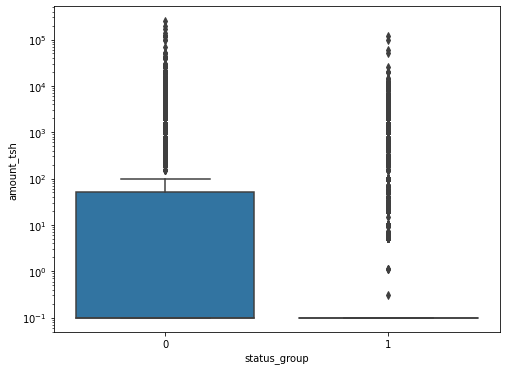

In [ ]:
import numpy as np
train_eda = train.copy()
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
display(train_eda.groupby('status_group')['amount_tsh'].describe())
train_eda['amount_tsh'] = train_eda['amount_tsh'] + 0.1
sns.boxplot(x = 'status_group', y = 'amount_tsh', data = train_eda)

train_eda['amount_tsh'] = np.log(train_eda['amount_tsh'] ) 
display(train_eda.groupby('status_group')['amount_tsh'].describe())


count     47520.000000
mean        493.866066
std        2833.822569
min           0.200000
25%         250.000000
50%         250.000000
75%         250.000000
max      250000.000000
Name: amount_tsh_enc, dtype: float64

count    47520.000000
mean       401.229281
std        722.066992
min          0.200000
25%        250.000000
50%        250.000000
75%        250.000000
max       5000.000000
Name: amount_tsh_clip, dtype: float64

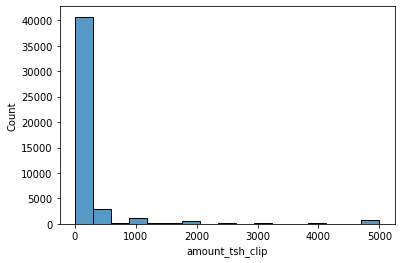

In [ ]:
import numpy as np
train_eda = train.copy()
amount_tsh_dict = train_eda[train_eda['amount_tsh'] != 0].groupby('source_class')['amount_tsh'].median()
train_eda['amount_tsh_enc'] = train_eda['amount_tsh']
train_eda['amount_tsh_enc'] = train_eda['source_class'].apply(lambda x: amount_tsh_dict[x])
train_eda.loc[train_eda['amount_tsh'] != 0, 'amount_tsh_enc'] = train_eda['amount_tsh']

display(train_eda['amount_tsh_enc'].describe())
train_eda['amount_tsh_clip'] = np.clip( train_eda['amount_tsh_enc'], np.percentile(train_eda['amount_tsh_enc'], [0,99])[0], np.percentile(train_eda['amount_tsh_enc'], [0,99])[1]) # winsorization
display(train_eda['amount_tsh_clip'].describe())

sns.histplot(x = 'amount_tsh_clip', data = train_eda)

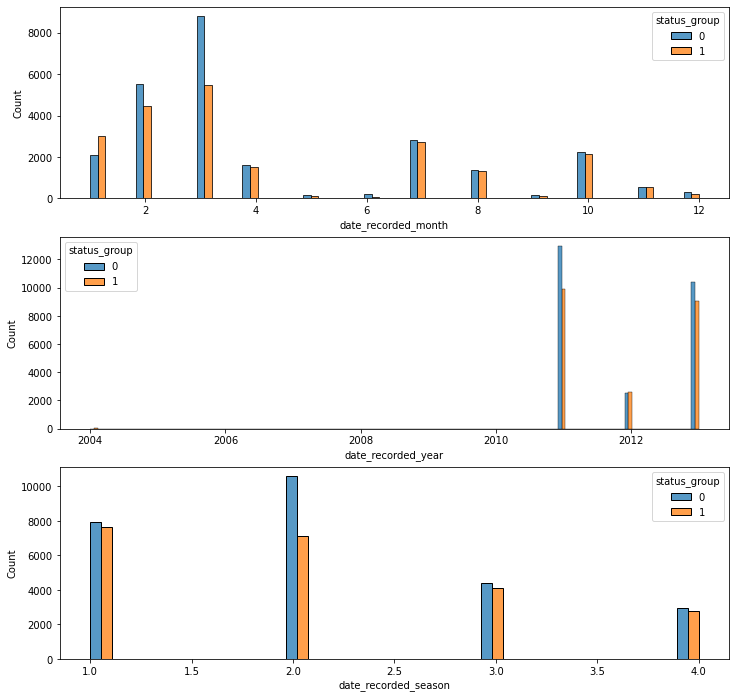

In [ ]:
train_eda = train.copy()
train_eda['date_recorded_month'] = train_eda['date_recorded'].str.split('/',expand = True)[0].astype(int)
train_eda['date_recorded_year'] = train_eda['date_recorded'].str.split('/',expand = True )[2].astype(int)
train_eda['date_recorded_season'] = train_eda['date_recorded_month'].astype(int)
train_eda['date_recorded_season'] = train_eda['date_recorded_season'].replace([12,1,2], 1)
train_eda['date_recorded_season'] = train_eda['date_recorded_season'].replace([3,4,5], 2)
train_eda['date_recorded_season'] = train_eda['date_recorded_season'].replace([6,7,8], 3)
train_eda['date_recorded_season'] = train_eda['date_recorded_season'].replace([9,10,11], 4)


# display(train_eda.groupby('status_group')['date_recorded_year'].value_counts(),
# train_eda.groupby('status_group')['date_recorded_month'].value_counts(),
# train_eda.groupby('status_group')['date_recorded_season'].value_counts()
# )

fig, axs = plt.subplots(3,1, figsize = (12,12))
sns.histplot(x = 'date_recorded_month', hue = 'status_group', data = train_eda, multiple="dodge", ax = axs[0])
sns.histplot(x = 'date_recorded_year', hue = 'status_group', data = train_eda, multiple="dodge", ax = axs[1])
sns.histplot(x = 'date_recorded_season', hue = 'status_group', data = train_eda, multiple="dodge", ax = axs[2])

count    47520.000000
mean        15.346580
std         10.080932
min          0.000000
25%          8.000000
50%         15.346580
75%         16.000000
max         53.000000
Name: age, dtype: float64

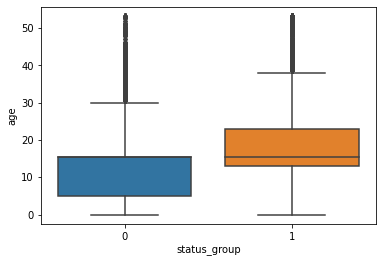

In [ ]:
train_eda[['date_recorded_year','construction_year']].head() 
train_eda['age'] = -9
train_eda.loc[train_eda['construction_year'] != 0, 'age'] = train_eda.loc[train_eda['construction_year'] != 0, 'date_recorded_year'] - train_eda.loc[train_eda['construction_year'] != 0, 'construction_year']
train_eda['age'].describe()

train_eda.loc[train_eda['age'] < 0, 'age'] = np.mean(train_eda.loc[train_eda['age'] >= 0, 'age'])

display(train_eda['age'].describe())

sns.boxplot(x = 'status_group', y = 'age', data = train_eda)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

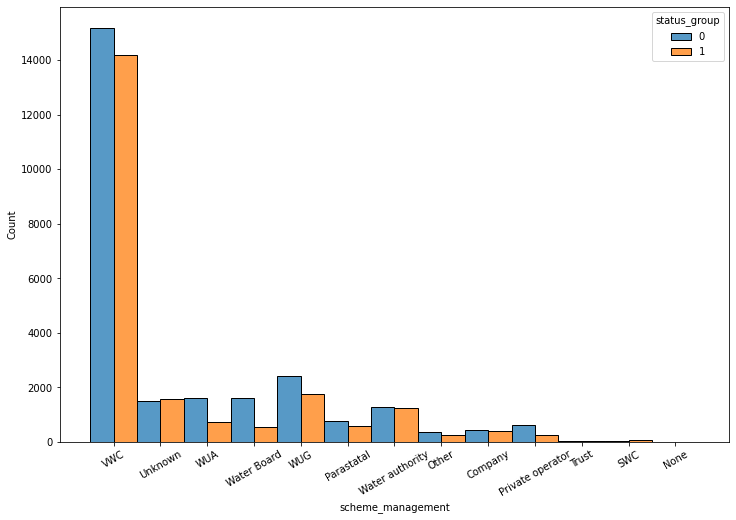

In [ ]:
# duplicate with management_group
train_eda['scheme_management'] = train_eda['scheme_management'].fillna('Unknown')
fig= plt.figure(figsize = (12,8))
sns.histplot(x = 'scheme_management', hue = 'status_group', data = train_eda, multiple="dodge")
plt.xticks(rotation = 30)


status_group  permit
0             True      17282
              False      7267
1             True      13784
              False      6749
Name: permit, dtype: int64

status_group  public_meeting
0             True              22788
              False              1728
1             True              17999
              False              2329
Name: public_meeting, dtype: int64

status_group  permit
0             True      17282
              False      7267
              nan        1319
1             True      13784
              False      6749
              nan        1119
Name: permit, dtype: int64

status_group  public_meeting
0             True              22788
              False              1728
              nan                1352
1             True              17999
              False              2329
              nan                1324
Name: public_meeting, dtype: int64

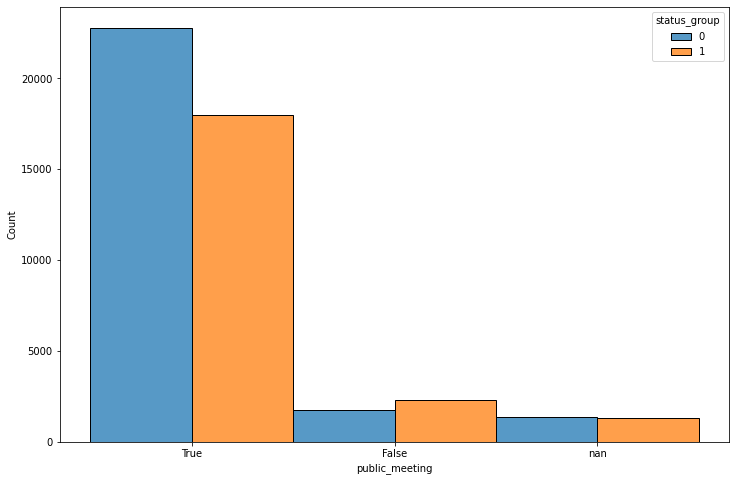

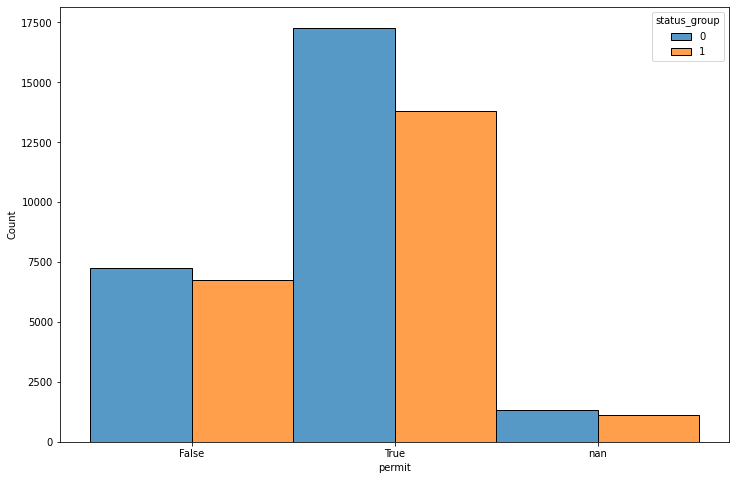

In [ ]:
train_eda = train.copy()
train_eda.isna().sum()

# not useful?
train_eda[['funder','installer','subvillage','scheme_management', 'scheme_name']].head()

# useful?
train_eda[['public_meeting', 'permit']].head()
display(train_eda.groupby('status_group')['permit'].value_counts())
display(train_eda.groupby('status_group')['public_meeting'].value_counts())

train_eda['public_meeting'] = train_eda['public_meeting'].astype(str)#.astype('category')

fig= plt.figure(figsize = (12,8))
sns.histplot(x = 'public_meeting', hue = 'status_group', data = train_eda, multiple="dodge")

train_eda['permit'] = train_eda['permit'].astype(str)#.astype('category')

fig= plt.figure(figsize = (12,8))
sns.histplot(x = 'permit', hue = 'status_group', data = train_eda, multiple="dodge")

display(train_eda.groupby('status_group')['permit'].value_counts())
display(train_eda.groupby('status_group')['public_meeting'].value_counts())

count    47520.000000
mean        35.088575
std          2.586757
min         29.610262
25%         33.228648
50%         34.907809
75%         37.176814
max         40.346196
Name: longitude_encode, dtype: float64

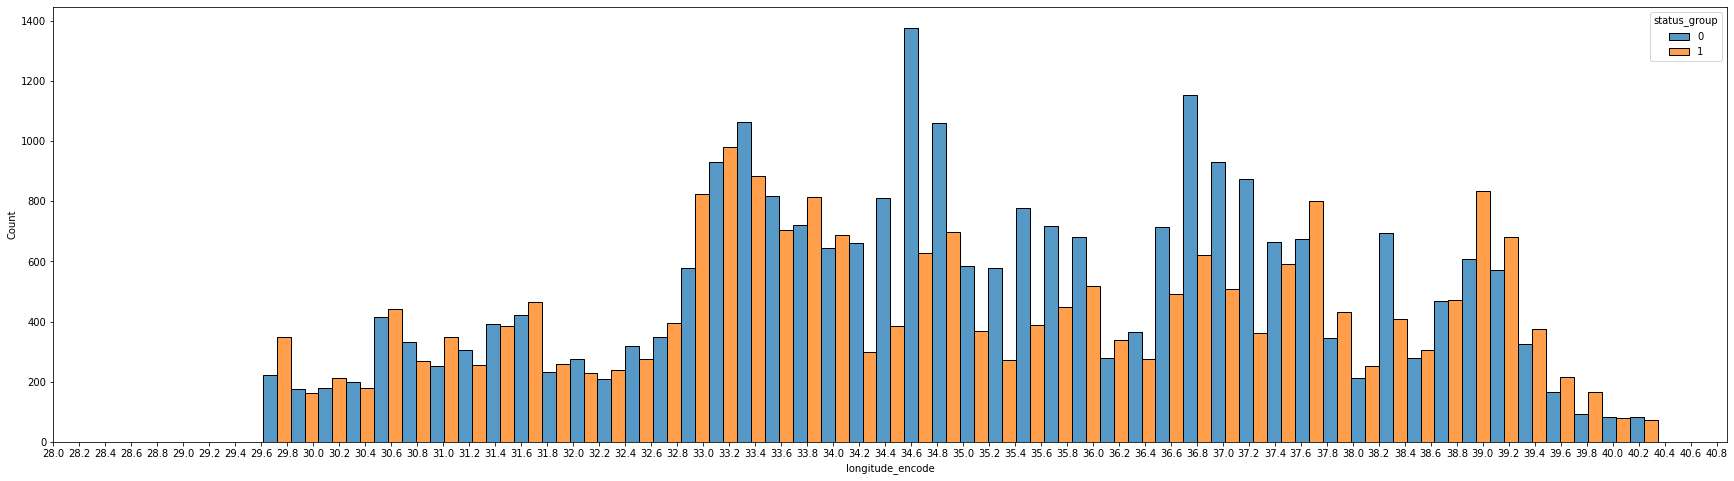

In [ ]:
# train_eda[train_eda['longitude'] < 10]
train_eda['region'].value_counts()
longitude_dict = train_eda[train_eda['longitude']>10].groupby('region')['longitude'].median()
train_eda['longitude_encode'] = train_eda['longitude']
train_eda['longitude_encode'] = train_eda['region'].apply(lambda x: longitude_dict[x])
train_eda.loc[train_eda['longitude'] > 10, 'longitude_encode'] = train_eda['longitude']

fig = plt.figure(figsize = (30,8))
sns.histplot(x = 'longitude_encode', hue = 'status_group', data = train_eda, multiple="dodge")
plt.xticks(np.arange(28,41,0.2))
train_eda['longitude_encode'].describe()

0

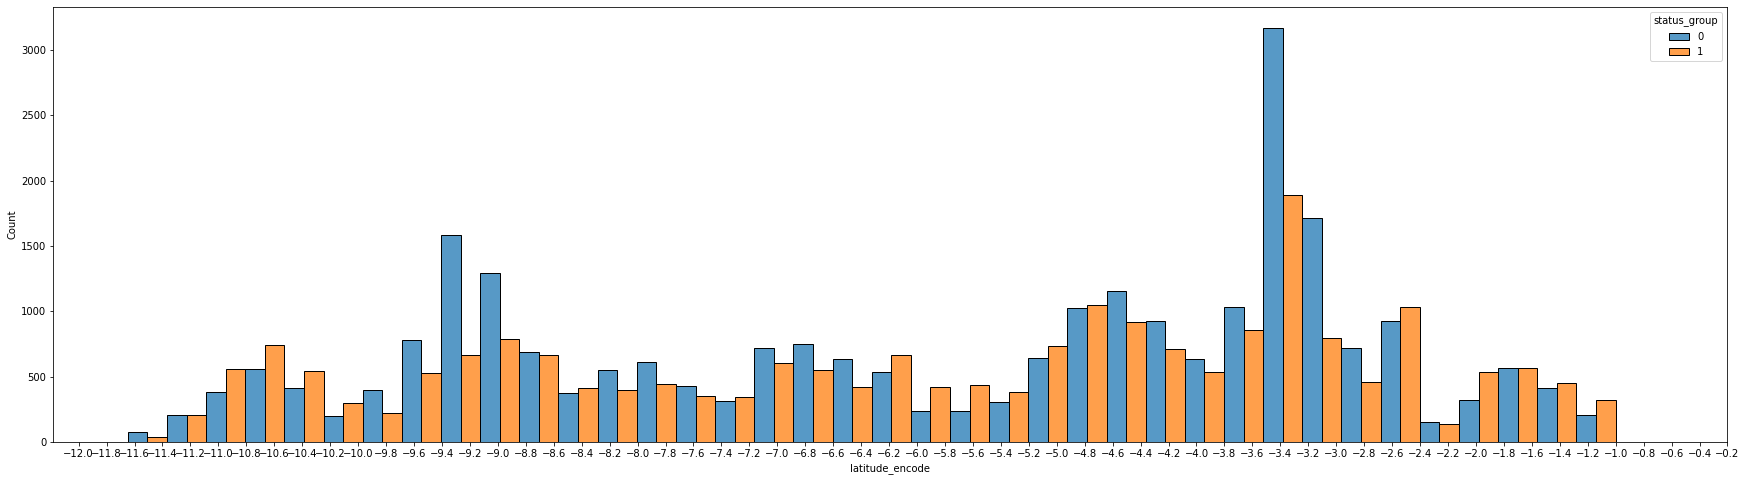

In [ ]:
# train_eda[train_eda['longitude'] < 10]
train_eda['region'].value_counts()
latitude_dict = train_eda[train_eda['latitude'] <= -1].groupby('region')['latitude'].median()
train_eda['latitude_encode'] = train_eda['latitude']
train_eda['latitude_encode'] = train_eda['region'].apply(lambda x: latitude_dict[x])
train_eda.loc[train_eda['latitude'] <= -1, 'latitude_encode'] = train_eda['latitude']



fig = plt.figure(figsize = (30,8))
sns.histplot(x = 'latitude_encode', hue = 'status_group', data = train_eda, multiple="dodge")
plt.xticks(np.arange(-12,0,0.2))
train_eda['latitude_encode'].describe()

train_eda['latitude_band'] = pd.qcut(train_eda['latitude_encode'], 10).astype(str).astype('category')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label = LabelEncoder()
train_eda['latitude_band'] = label.fit_transform(train_eda['latitude_band'])
train_eda['latitude_band'].value_counts()
train_eda['latitude_band'].isna().sum()
# fig = plt.figure(figsize = (30,8))
# sns.histplot(x = 'latitude_band', hue = 'status_group', data = train_eda, multiple="dodge")

# plt.xticks(np.arange(-12,0,0.2))

,gps_height,longitude,latitude
count,47520.000000,47520.000000,47520.000000
mean,668.806292,34.070971,-5.707596
std,692.874676,6.572807,2.950499
min,-90.000000,-0.030866,-11.647942
25%,0.000000,33.085388,-8.546778
50%,371.000000,34.907809,-5.020870
75%,1320.000000,37.176814,-3.325752
max,2770.000000,40.346196,0.009301


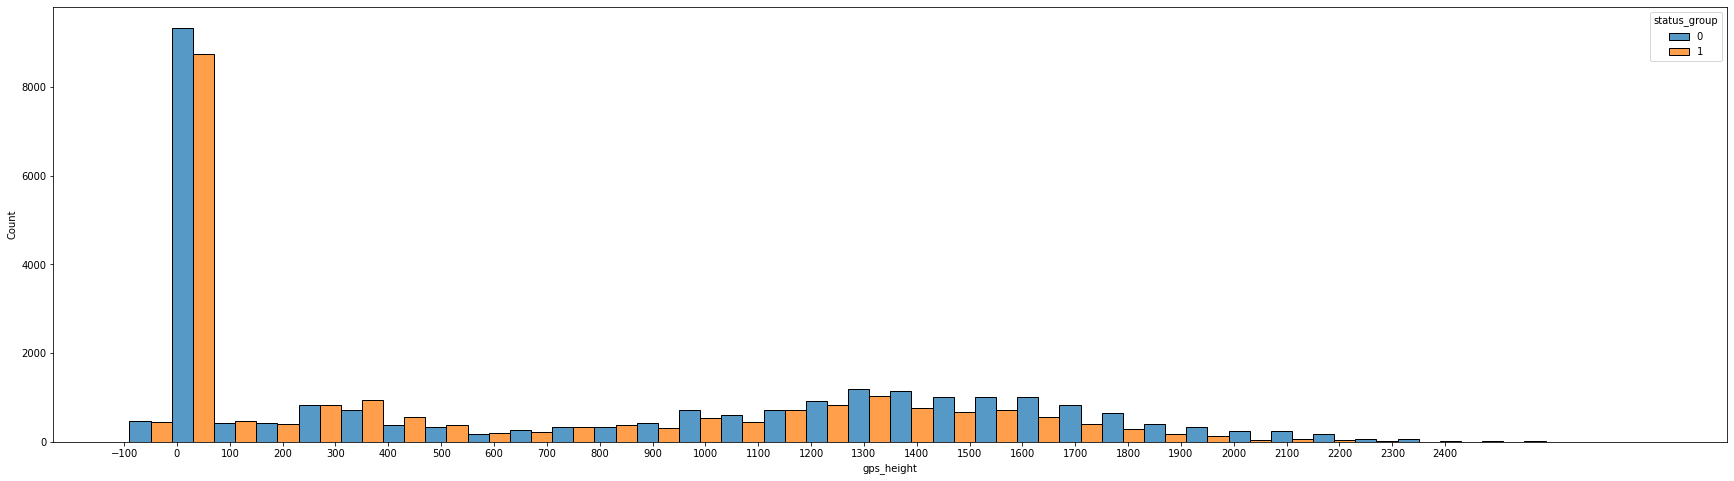

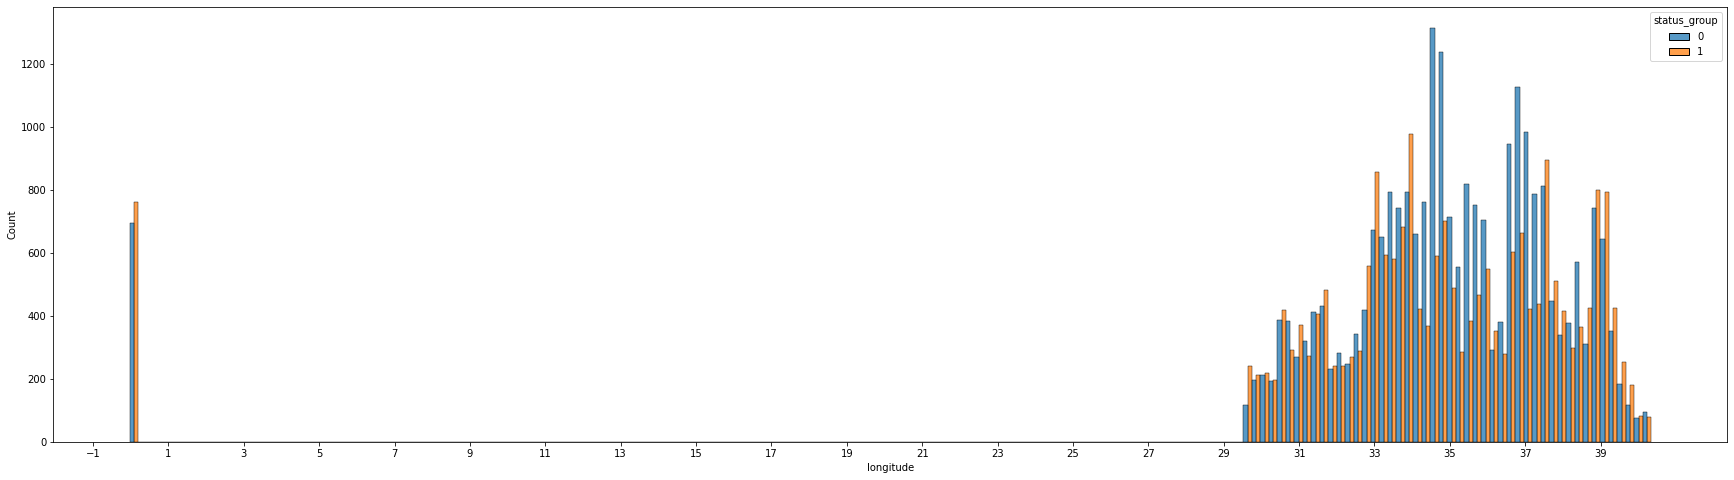

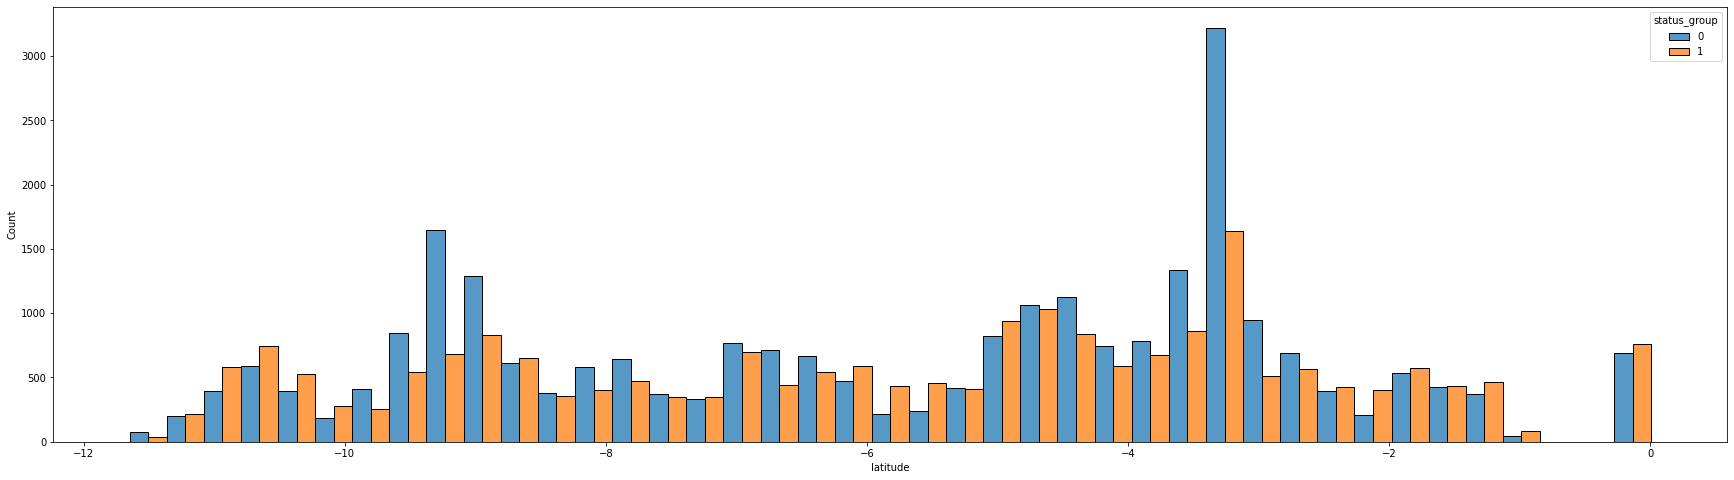

In [ ]:
import numpy as np
train_eda = train.copy()
train_eda.head()
display(train_eda[['gps_height', 'longitude', 'latitude']].describe())

fig= plt.subplots(1,1, figsize = (30,8))
sns.histplot(x = 'gps_height', hue = 'status_group', binwidth = 80, data = train_eda, multiple="dodge")
plt.xticks(np.arange(-100,2500,100))

fig = plt.figure(figsize = (30,8))
sns.histplot(x = 'longitude', hue = 'status_group', data = train_eda, multiple="dodge")
plt.xticks(np.arange(-1,41,2))

fig = plt.figure(figsize = (30,8))
sns.histplot(x = 'latitude', hue = 'status_group', data = train_eda, multiple="dodge")


In [ ]:
train_eda[train_eda['longitude'] <= 10]['latitude'].describe()
train_eda[train_eda['longitude'] <= 10]['basin'].unique()


array(['Lake Victoria', 'Lake Tanganyika'], dtype=object)

Lake Victoria              8239
Pangani                    7079
Rufiji                     6379
Internal                   6257
Lake Tanganyika            5133
Wami / Ruvu                4794
Lake Nyasa                 4039
Ruvuma / Southern Coast    3625
Lake Rukwa                 1975
Name: basin, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

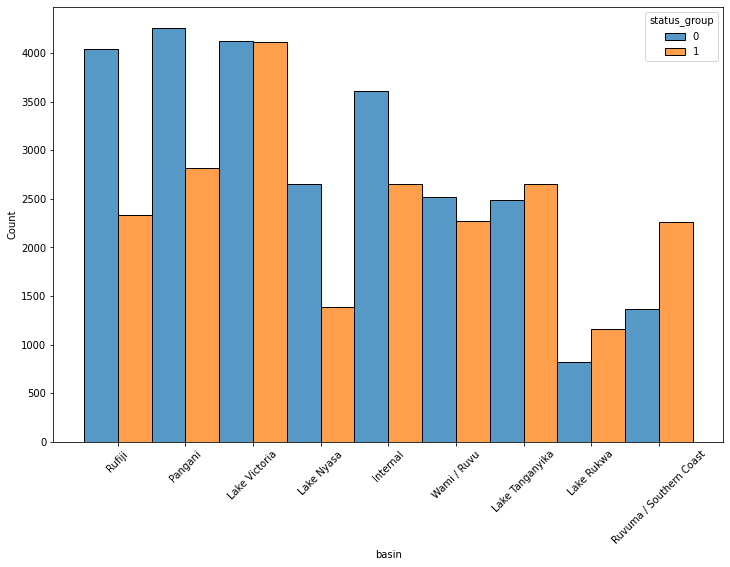

In [ ]:
train_eda = train.copy()
train_eda.head()

# display(len(train_eda['wpt_name'].unique()))
display(train_eda['basin'].value_counts())

fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'basin', hue = 'status_group', data = train_eda, multiple="dodge")
plt.xticks(rotation=45)

Iringa           4227
Shinyanga        4025
Mbeya            3708
Kilimanjaro      3469
Morogoro         3206
Kagera           2679
Arusha           2663
Mwanza           2454
Kigoma           2255
Ruvuma           2142
Pwani            2089
Tanga            2018
Dodoma           1744
Singida          1674
Mara             1590
Tabora           1553
Rukwa            1446
Mtwara           1400
Manyara          1302
Lindi            1234
Dar es Salaam     642
Name: region, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

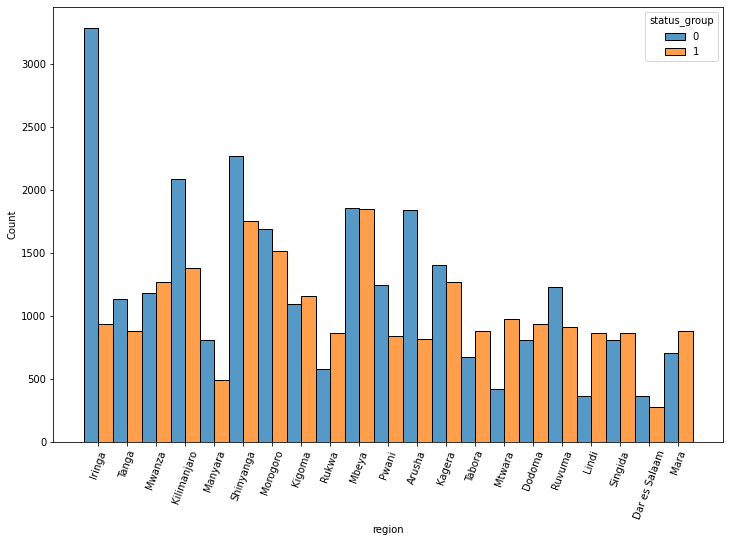

In [ ]:
train_eda = train.copy()
train_eda.head()

# len(train_eda['region'].unique())
display(train_eda['region'].value_counts())


fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'region', hue = 'status_group', data = train_eda, multiple="dodge")
plt.xticks(rotation=70)



11    4232
17    4045
12    3708
3     3469
5     3231
18    2683
19    2411
2     2395
16    2255
10    2142
4     1993
1     1744
13    1674
20    1590
14    1571
15    1446
21    1302
6     1281
80     994
60     807
90     742
7      642
99     346
9      312
24     268
8      236
40       1
Name: region_code, dtype: int64

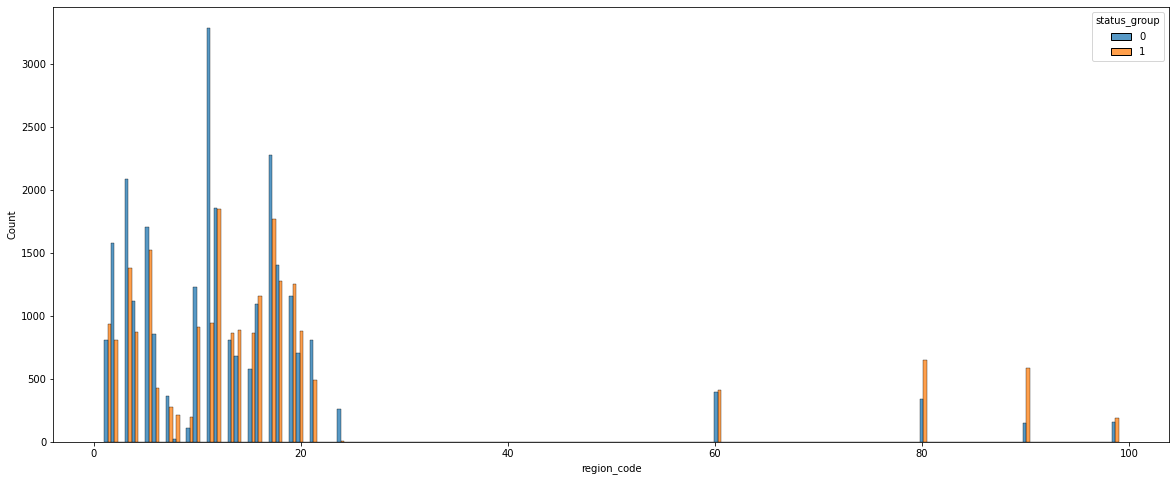

In [ ]:
train_eda = train.copy()
train_eda.head()

display(train_eda['region_code'].value_counts())

fig = plt.figure(figsize = (20,8))
sns.histplot(x = 'region_code', hue = 'status_group', data = train_eda, multiple="dodge")



1     9768
2     8981
3     8021
4     7162
5     3463
6     3248
7     2657
8      846
30     804
33     701
53     590
43     401
13     313
23     236
63     161
62      89
60      47
0       17
80       9
67       6
Name: district_code, dtype: int64

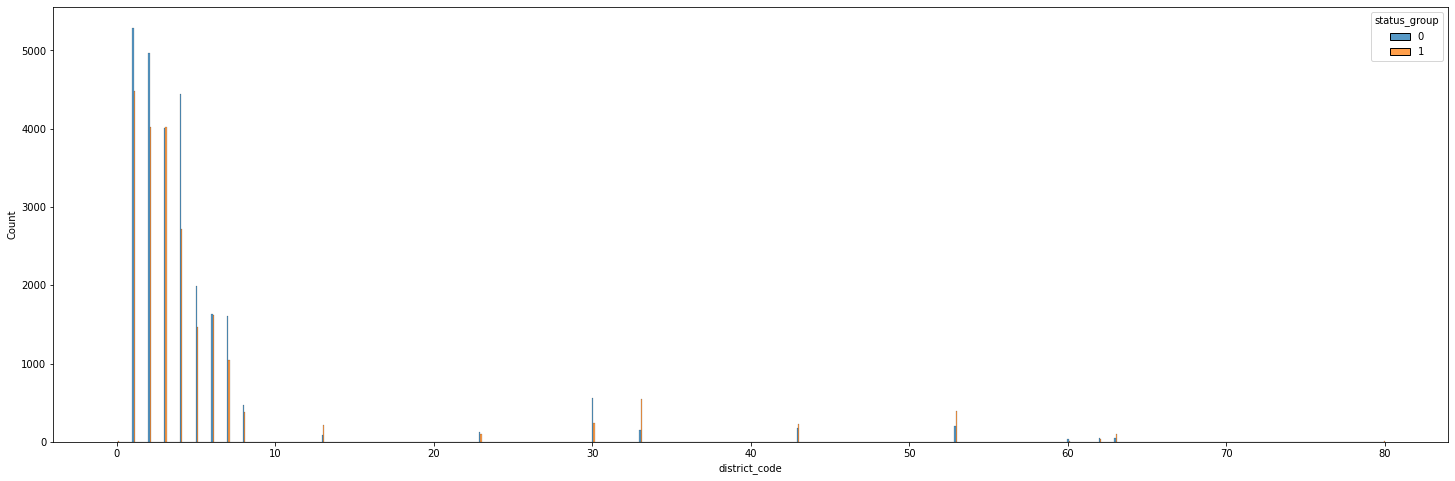

In [ ]:
train_eda = train.copy()
train_eda.head()

display(train_eda['district_code'].value_counts())

fig = plt.figure(figsize = (25,8))
sns.histplot(x = 'district_code', hue = 'status_group', data = train_eda, multiple="dodge")


In [ ]:
train_eda = train.copy()
train_eda.head()

display(len(train_eda['lga'].unique()))
display(train_eda['lga'].value_counts())

display(len(train_eda['ward'].unique()))
display(train_eda['ward'].value_counts())


125

Njombe          2008
Arusha Rural     993
Moshi Rural      988
Bariadi          950
Rungwe           878
                ... 
Songea Urban      63
Kigoma Urban      56
Arusha Urban      49
Lindi Urban       16
Nyamagana          1
Name: lga, Length: 125, dtype: int64

2085

Igosi               241
Imalinyi            201
Mdandu              185
Nduruma             183
Siha Kati           177
                   ... 
Mwanga Kaskazini      1
Kapilula              1
Mkwajuni              1
Izia                  1
Mwisi                 1
Name: ward, Length: 2085, dtype: int64

In [ ]:
import re
display(train_eda['lga'].str.contains('Urban').sum())
display(train_eda['lga'].str.contains('Rural').sum())

train_eda['lga_group'] = train_eda['lga']
train_eda.loc[train_eda['lga'].str.contains('Urban') == True, 'lga_group'] = 'Urban'
train_eda.loc[train_eda['lga'].str.contains('Rural') == True, 'lga_group'] = 'Rural'

train_eda['lga_group'].value_counts()


fig = plt.figure(figsize = (25,8))
sns.histplot(x = 'lga', hue = 'status_group', data = train_eda, multiple="dodge")
plt.xticks(rotation = 70)

fig = plt.figure(figsize = (25,12))
sns.histplot(x = 'lga_group', hue = 'status_group', data = train_eda, multiple="dodge")
plt.xticks(rotation = 70)

1337

7638

Rural        7638
Njombe       2008
Urban        1337
Bariadi       950
Rungwe        878
             ... 
Ilemela       112
Mafia         105
Tanga          75
Kinondoni      64
Nyamagana       1
Name: lga_group, Length: 100, dtype: int64

In [ ]:
uncommonLga = train_eda[['lga_group']].value_counts()[25:].reset_index()['lga_group'].tolist()
train_eda['lga_clip'] = train_eda['lga_group']
train_eda['lga_clip'] = train_eda['lga_clip'].replace(uncommonLga, 'Others')
train_eda['lga_clip'].value_counts()



Others       21206
Rural         7638
Njombe        2008
Urban         1337
Bariadi        950
Rungwe         878
Kilosa         869
Kasulu         845
Mbozi          828
Bagamoyo       805
Meru           797
Kilombero      770
Same           709
Kibondo        701
Kyela          697
Kahama         660
Maswa          659
Magu           654
Karagwe        616
Mbinga         612
Serengeti      581
Namtumbo       560
Lushoto        543
Ngara          536
Mvomero        534
Mpanda         527
Name: lga_clip, dtype: int64

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
0,25868.0,188.386114,528.364876,0.0,0.0,40.0,200.00,30500.0
1,21652.0,171.714761,421.565449,0.0,0.0,1.0,230.25,15300.0


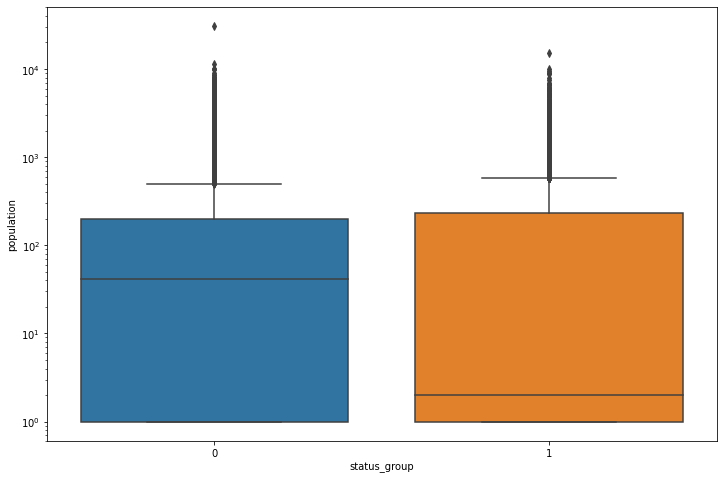

In [ ]:
train_eda = train.copy()
train_eda.head()

display(train_eda.groupby('status_group')['population'].describe())

fig, ax = plt.subplots(figsize = (12,8))
train_eda['population'] = train_eda['population'] + 1
ax.set_yscale('log')
sns.boxplot(x = 'status_group', y = 'population', data = train_eda)

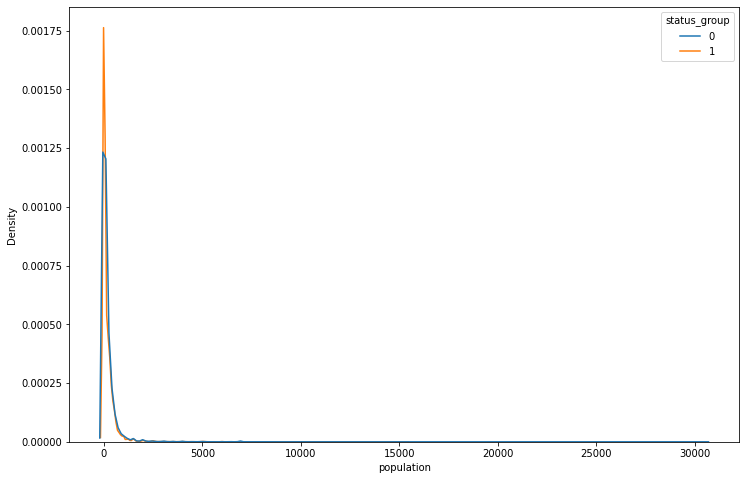

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
# ax.set_yscale('log')
sns.kdeplot(data = train_eda, x = 'population', hue = 'status_group')

array([2008, 1971,    0, 2009, 1982, 2004, 2011, 1984, 1985, 1987, 1993,
       1974, 2003, 1960, 2001, 1988, 2000, 1999, 1997, 2006, 1980, 1981,
       1990, 2002, 2010, 1995, 2007, 2005, 1978, 1972, 1989, 1998, 1970,
       1992, 1977, 1975, 2012, 2013, 1991, 1973, 1976, 1979, 1994, 1969,
       1996, 1963, 1983, 1966, 1968, 1986, 1964, 1961, 1965, 1967, 1962])

16563

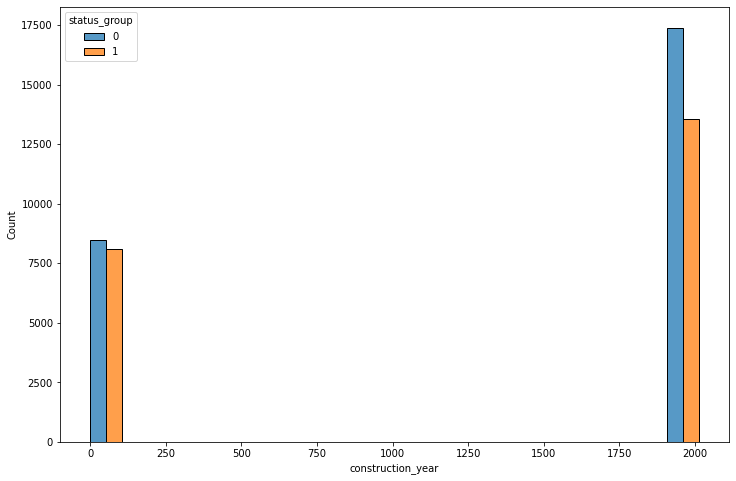

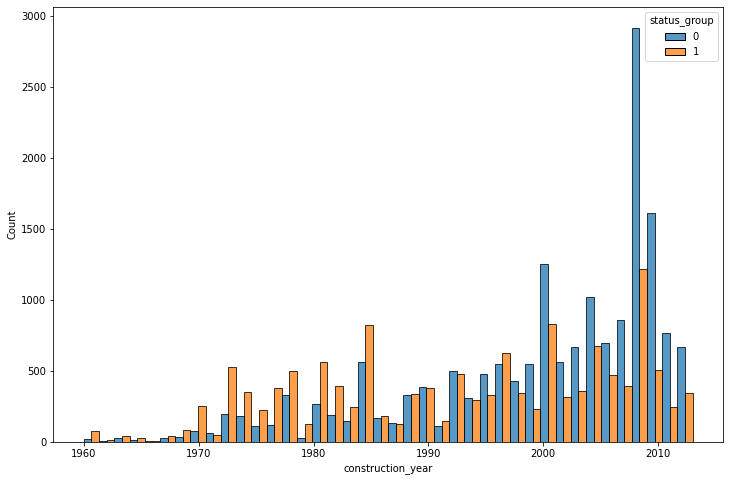

In [ ]:
train_eda = train.copy()
train_eda.head()

train_eda['recorded_by'].unique()
display(train_eda['construction_year'].unique()) 

display(len(train_eda[train_eda['construction_year'] == 0]['construction_year']))

fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'construction_year', data = train_eda, hue = 'status_group', multiple='dodge')

fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'construction_year', data = train_eda[train_eda['construction_year'] != 0], hue = 'status_group', multiple='dodge')

gravity                      21425
nira/tanira                   6490
other                         5080
submersible                   3811
swn 80                        2990
mono                          2310
india mark ii                 1942
afridev                       1436
ksb                           1137
other - rope pump              364
other - swn 81                 177
windmill                        96
india mark iii                  74
other - play pump               62
cemo                            61
walimi                          35
climax                          28
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

gravity            21425
nira/tanira         6490
other               5080
submersible         4948
swn 80              2990
mono                2310
india mark ii       1942
afridev             1436
rope pump            364
other handpump       276
wind-powered          96
other motorpump       89
india mark iii        74
Name: extraction_type_group, dtype: int64

gravity         21425
handpump        13208
other            5080
submersible      4948
motorpump        2399
rope pump         364
wind-powered       96
Name: extraction_type_class, dtype: int64

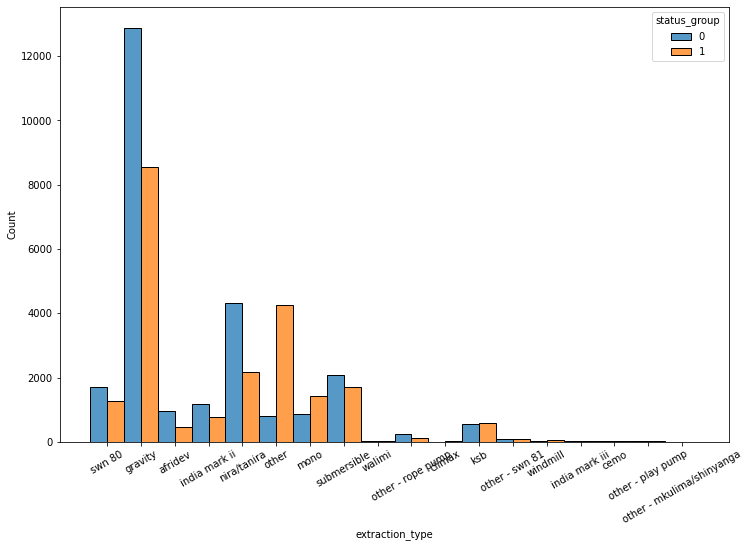

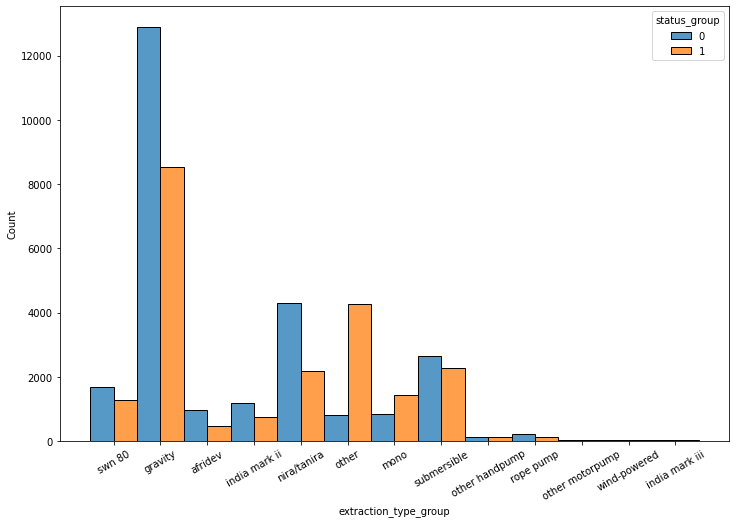

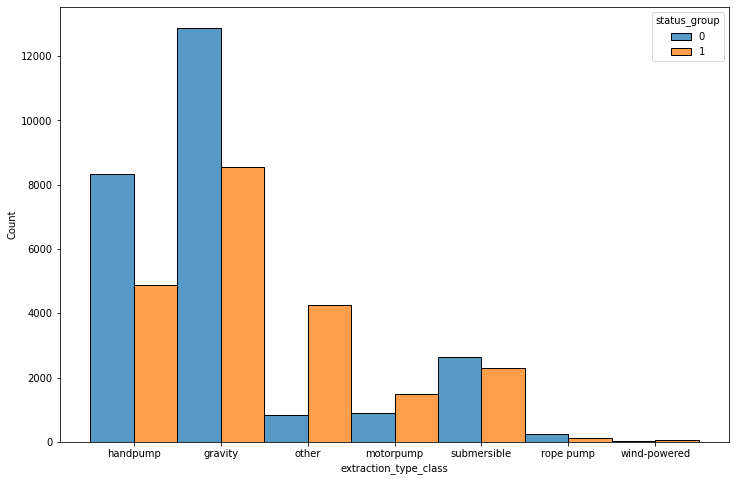

In [ ]:
train_eda = train.copy()
train_eda.head()

display(train_eda['extraction_type'].value_counts())
display(train_eda['extraction_type_group'].value_counts())
display(train_eda['extraction_type_class'].value_counts())

fig = plt.figure(figsize = (12,8))
plt.xticks(rotation=30)
sns.histplot(x = 'extraction_type', hue = 'status_group', data = train_eda, multiple='dodge')

fig = plt.figure(figsize = (12,8))
plt.xticks(rotation=30)
sns.histplot(x = 'extraction_type_group', hue = 'status_group', data = train_eda, multiple='dodge')

fig = plt.figure(figsize = (12,8))
# plt.xticks(rotation=70)
sns.histplot(x = 'extraction_type_class', hue = 'status_group', data = train_eda, multiple='dodge')

vwc                 32393
wug                  5244
water board          2312
wua                  2043
private operator     1583
parastatal           1419
water authority       725
other                 656
company               546
unknown               449
other - school         87
trust                  63
Name: management, dtype: int64

user-group    41992
commercial     2917
parastatal     1419
other           743
unknown         449
Name: management_group, dtype: int64

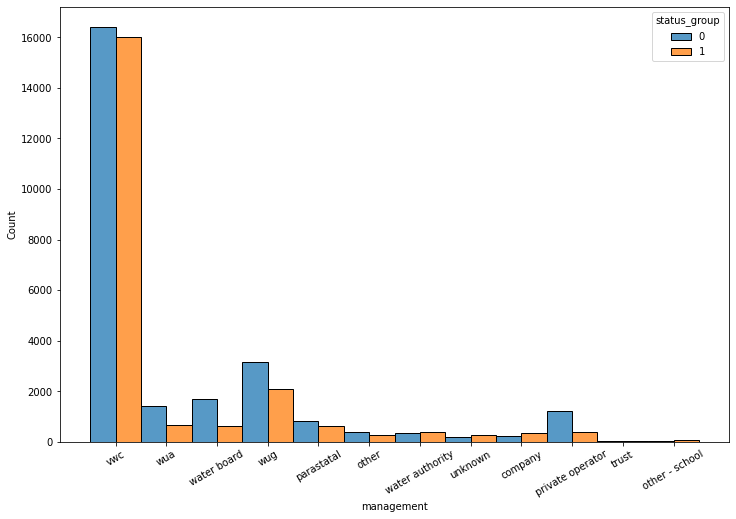

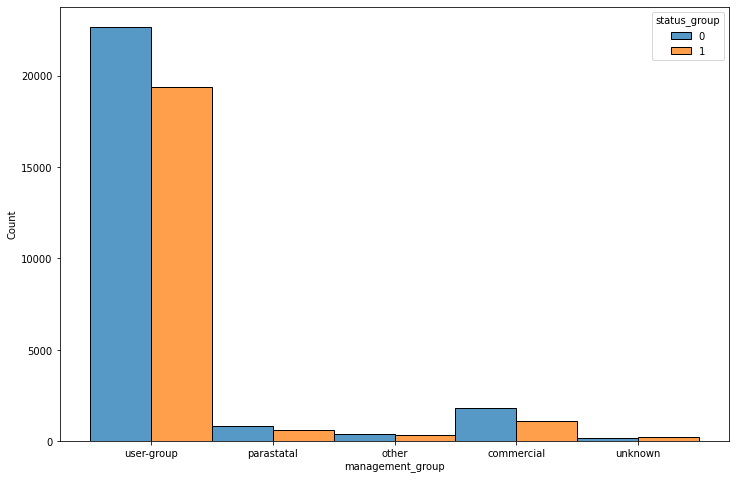

In [ ]:
train_eda = train.copy()
train_eda.head()

display(train_eda['management'].value_counts())
display(train_eda['management_group'].value_counts())

fig = plt.figure(figsize = (12,8))
plt.xticks(rotation = 30)
sns.histplot(x = 'management', hue = 'status_group', data = train_eda, multiple='dodge')

fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'management_group', hue = 'status_group', data = train_eda, multiple='dodge')


never pay                20238
pay per bucket            7187
pay monthly               6659
unknown                   6535
pay when scheme fails     3145
pay annually              2905
other                      851
Name: payment, dtype: int64

never pay     20238
per bucket     7187
monthly        6659
unknown        6535
on failure     3145
annually       2905
other           851
Name: payment_type, dtype: int64

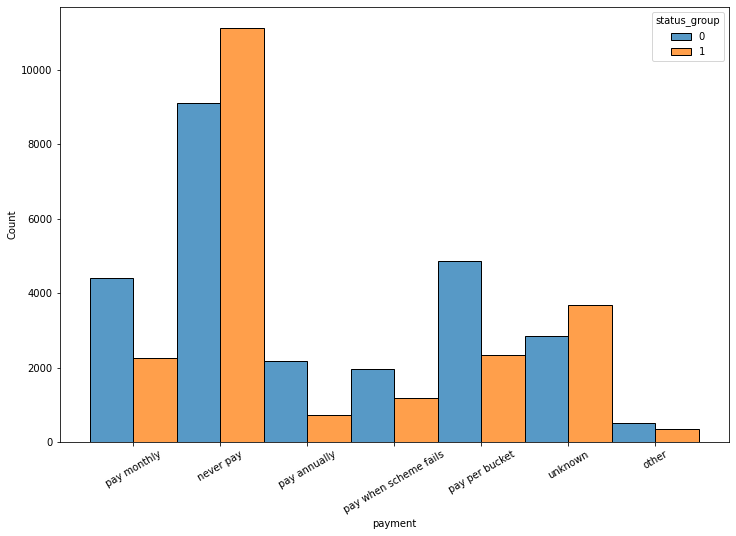

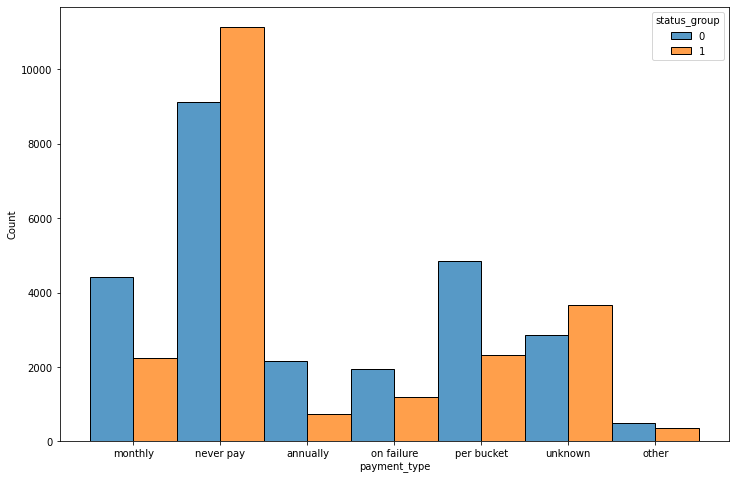

In [ ]:
display(train_eda['payment'].value_counts())
display(train_eda['payment_type'].value_counts())


fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'payment', hue = 'status_group', data = train_eda, multiple='dodge')
plt.xticks(rotation = 30)

fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'payment_type', hue = 'status_group', data = train_eda, multiple='dodge')

soft                  40675
salty                  3863
unknown                1521
milky                   639
coloured                381
salty abandoned         270
fluoride                157
fluoride abandoned       14
Name: water_quality, dtype: int64

good        40675
salty        4133
unknown      1521
milky         639
colored       381
fluoride      171
Name: quality_group, dtype: int64

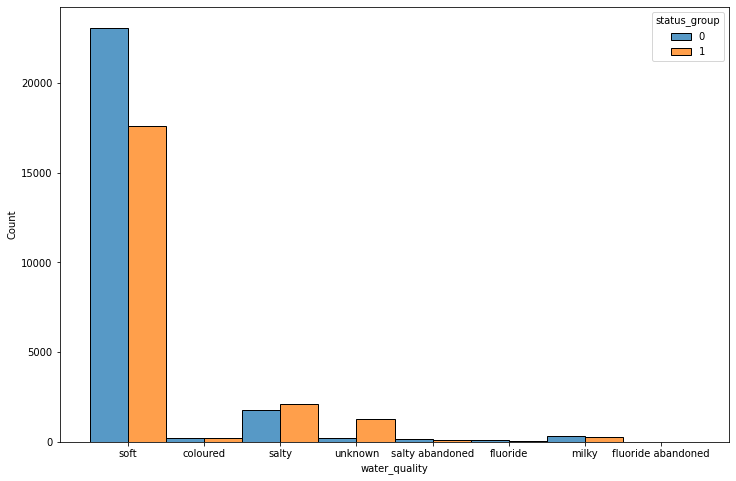

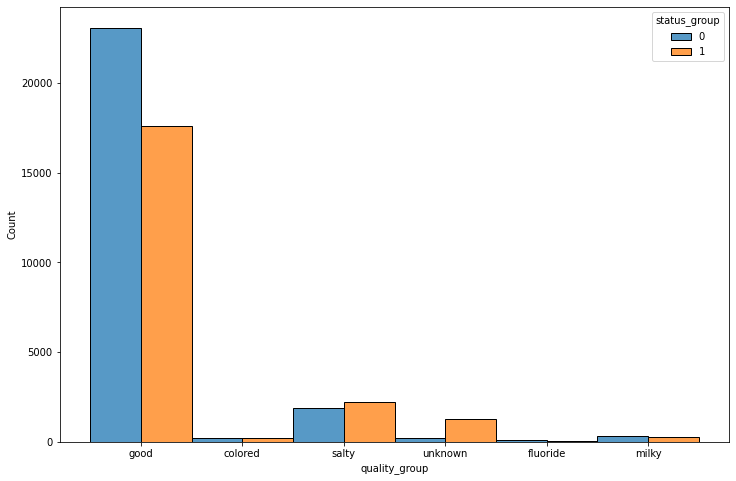

In [ ]:
display(train_eda['water_quality'].value_counts())
display(train_eda['quality_group'].value_counts())

fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'water_quality', hue = 'status_group', data = train_eda, multiple='dodge')
fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'quality_group', hue = 'status_group', data = train_eda, multiple='dodge')



enough          26617
insufficient    12035
dry              4972
seasonal         3266
unknown           630
Name: quantity, dtype: int64

enough          26617
insufficient    12035
dry              4972
seasonal         3266
unknown           630
Name: quantity_group, dtype: int64

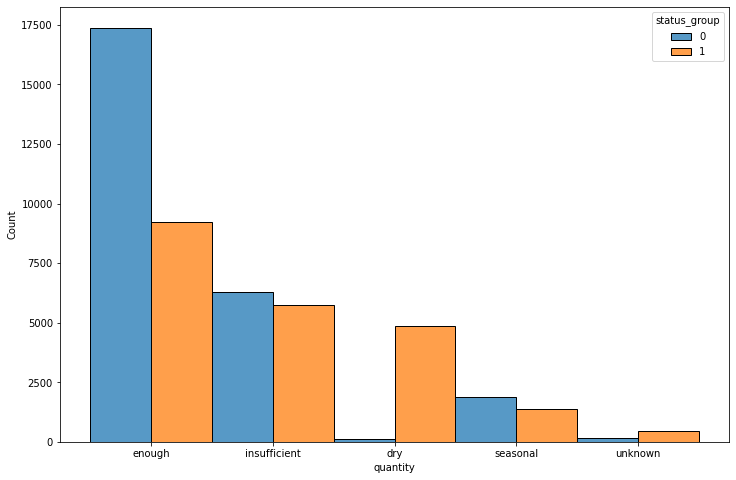

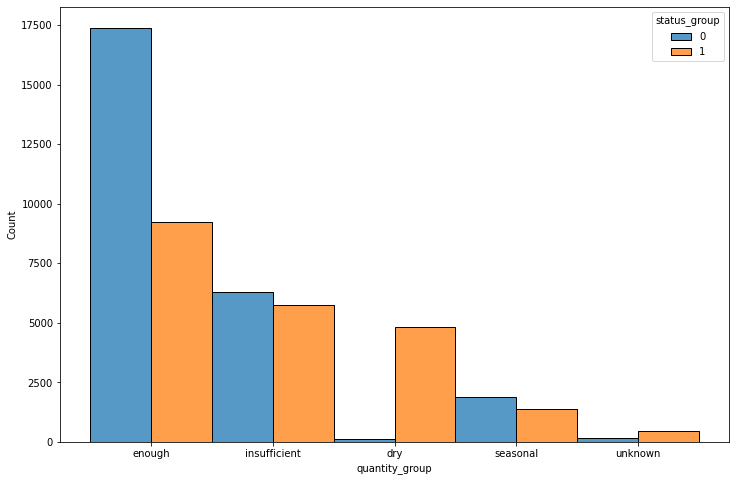

In [ ]:
display(train_eda['quantity'].value_counts())
display(train_eda['quantity_group'].value_counts())

fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'quantity', hue = 'status_group', data = train_eda, multiple='dodge')
fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'quantity_group', hue = 'status_group', data = train_eda, multiple='dodge')



spring                  13601
shallow well            13422
machine dbh              8863
river                    7664
rainwater harvesting     1892
hand dtw                  713
lake                      620
dam                       535
other                     162
unknown                    48
Name: source, dtype: int64

spring                  13601
shallow well            13422
borehole                 9576
river/lake               8284
rainwater harvesting     1892
dam                       535
other                     210
Name: source_type, dtype: int64

groundwater    36599
surface        10711
unknown          210
Name: source_class, dtype: int64

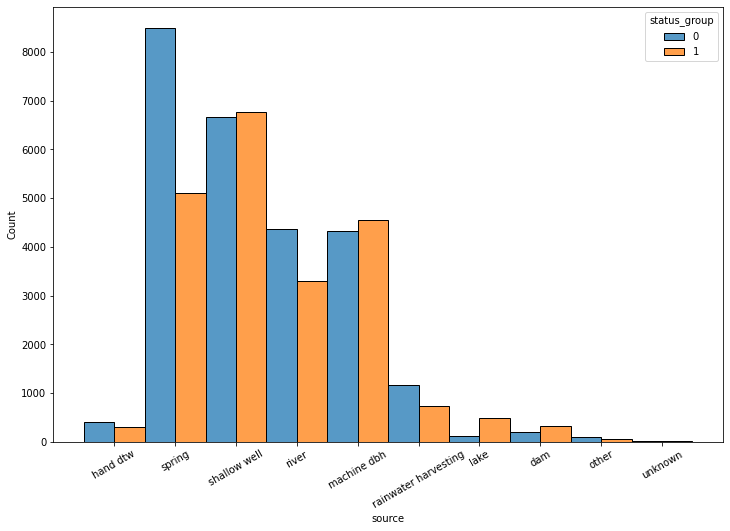

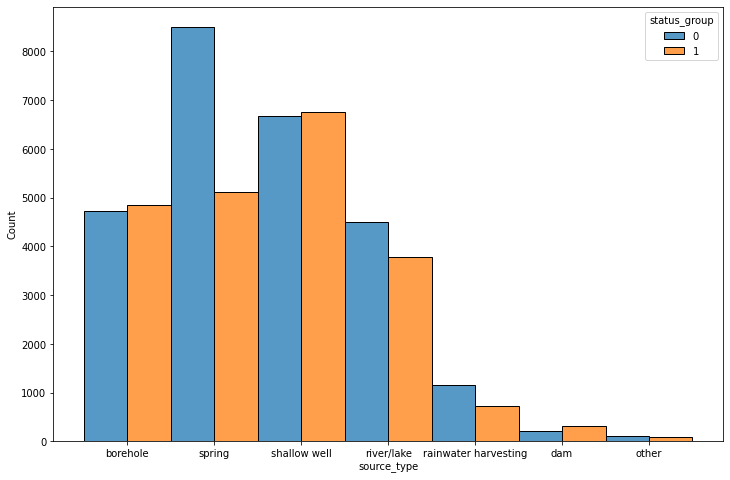

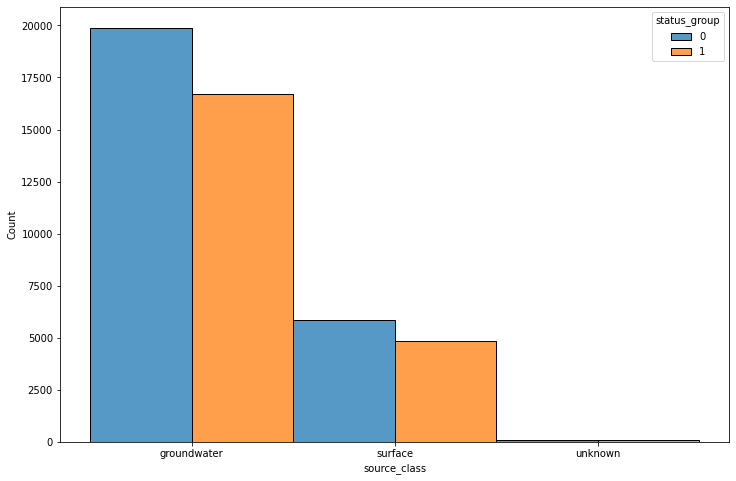

In [ ]:
display(train_eda['source'].value_counts())
display(train_eda['source_type'].value_counts())
display(train_eda['source_class'].value_counts())

fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'source', hue = 'status_group', data = train_eda, multiple='dodge')
plt.xticks(rotation = 30)
fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'source_type', hue = 'status_group', data = train_eda, multiple='dodge')
fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'source_class', hue = 'status_group', data = train_eda, multiple='dodge')


communal standpipe             22794
hand pump                      14036
other                           5073
communal standpipe multiple     4892
improved spring                  629
cattle trough                     92
dam                                4
Name: waterpoint_type, dtype: int64

communal standpipe    27686
hand pump             14036
other                  5073
improved spring         629
cattle trough            92
dam                       4
Name: waterpoint_type_group, dtype: int64

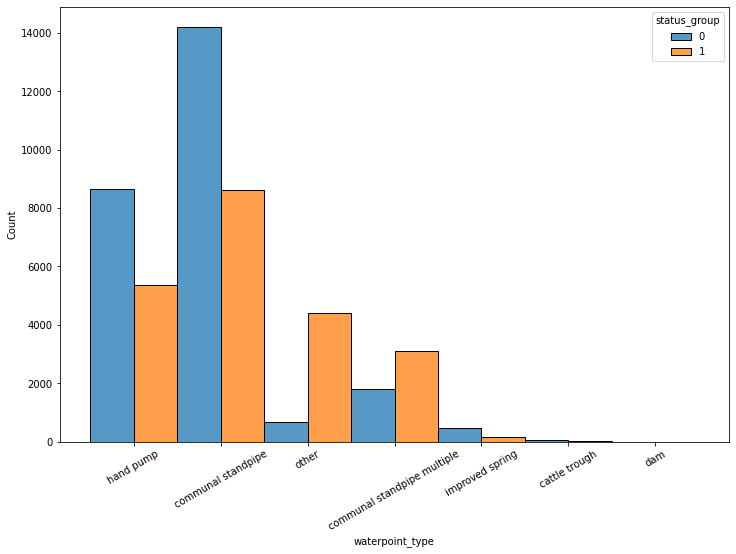

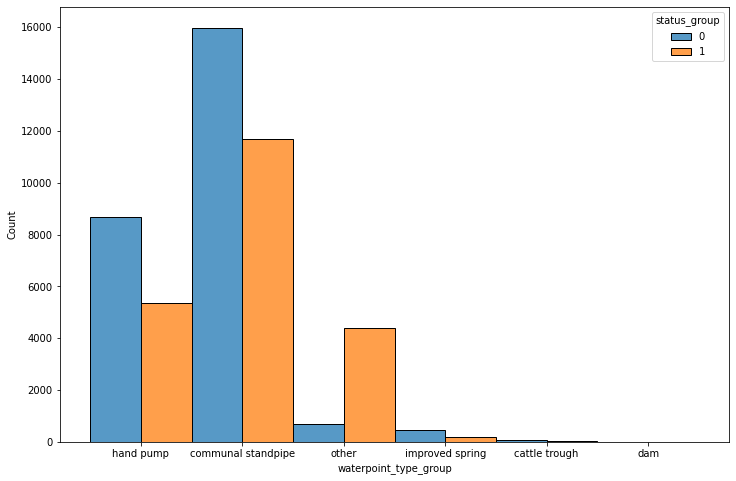

In [ ]:

display(train_eda['waterpoint_type'].value_counts())
display(train_eda['waterpoint_type_group'].value_counts())

fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'waterpoint_type', hue = 'status_group', data = train_eda, multiple='dodge')
plt.xticks(rotation=30)

fig = plt.figure(figsize = (12,8))
sns.histplot(x = 'waterpoint_type_group', hue = 'status_group', data = train_eda, multiple='dodge')

